In [13]:
# import the necessary packages
# import argparse
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

In [14]:
# load the image and convert it to grayscale
image = cv2.imread('sweetwhip.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# construct a rectangular kernel (13x5) and apply a blackhat
# operation which enables us to find dark regions on a light
# background
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

# similarly, a tophat (also called a "whitehat") operation will
# enable us to find light regions on a dark background
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)
# show the output images

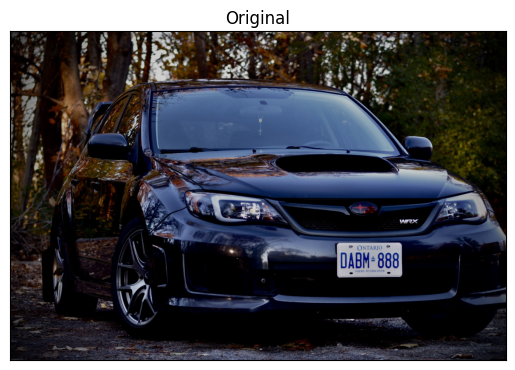

In [15]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

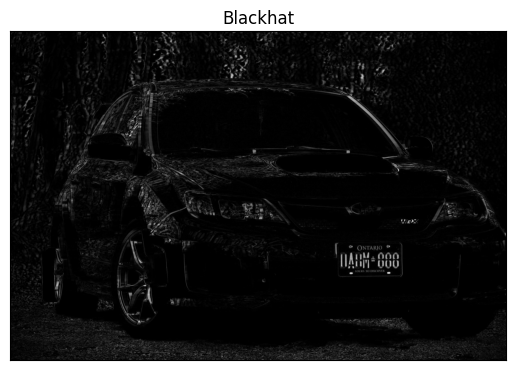

In [16]:
plt.imshow(blackhat, cmap='gray')
plt.title('Blackhat'), plt.xticks([]), plt.yticks([])
plt.show()

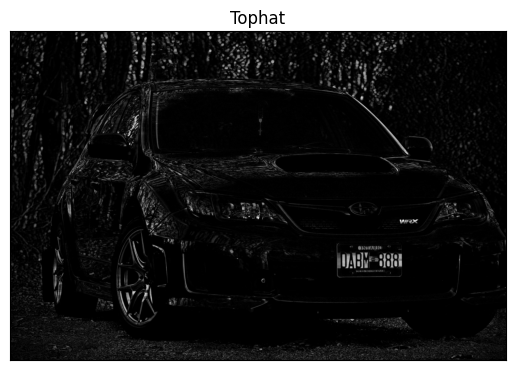

In [17]:
plt.imshow(tophat, cmap='gray')
plt.title('Tophat'), plt.xticks([]), plt.yticks([])
plt.show()

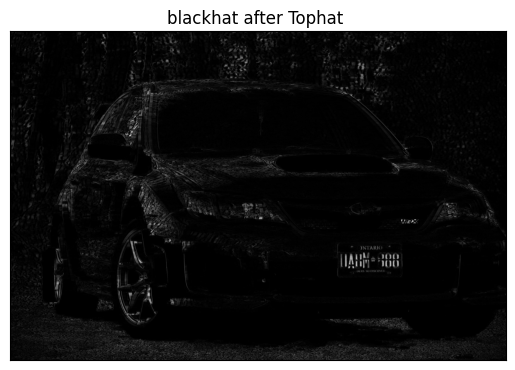

In [18]:
# ret, threshBedard = cv2.threshold(grayBedard,127,255,cv2.THRESH_BINARY)

tophatBlackHat = cv2.morphologyEx(tophat, cv2.MORPH_BLACKHAT, rectKernel)

plt.imshow(tophatBlackHat, cmap='gray')
plt.title('blackhat after Tophat '), plt.xticks([]), plt.yticks([])
plt.show()

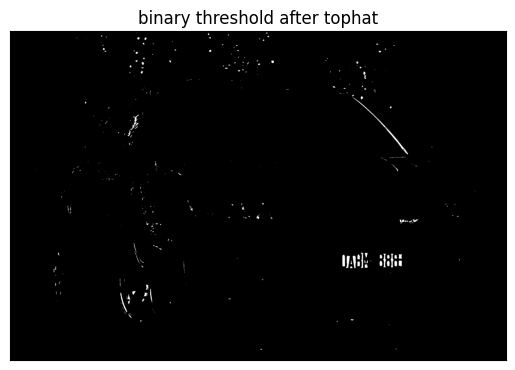

In [19]:
ret, threshTopHat = cv2.threshold(tophat,127,255,cv2.THRESH_BINARY)
plt.imshow(threshTopHat, cmap='gray')
plt.title('binary threshold after tophat'), plt.xticks([]), plt.yticks([])
plt.show()

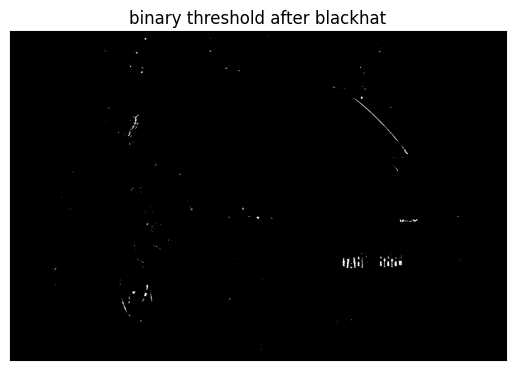

In [20]:
ret, threshTopHat = cv2.threshold(tophat,150,255,cv2.THRESH_BINARY)
plt.imshow(threshTopHat, cmap='gray')
plt.title('binary threshold after blackhat'), plt.xticks([]), plt.yticks([])
plt.show()

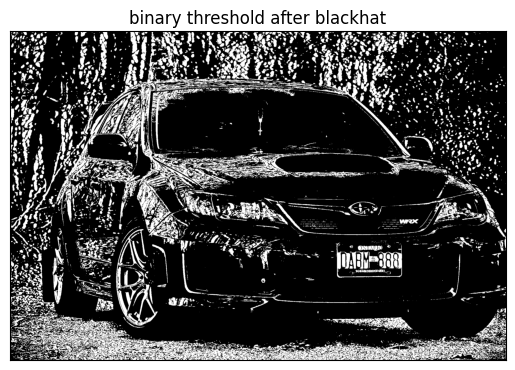

In [21]:
ret, threshTopHat = cv2.threshold(tophat,10,255,cv2.THRESH_BINARY)
plt.imshow(threshTopHat, cmap='gray')
plt.title('binary threshold after blackhat'), plt.xticks([]), plt.yticks([])
plt.show()

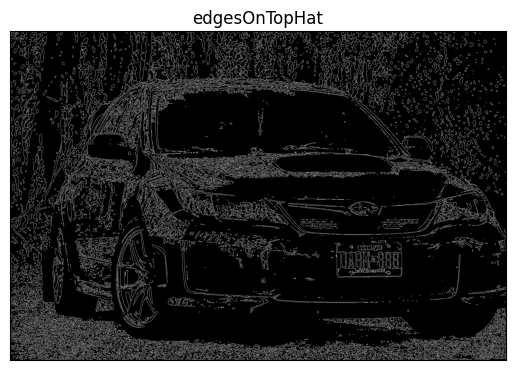

In [22]:
edgesOnTopHat = cv2.Canny(image=threshTopHat, threshold1=20, threshold2=20)
plt.imshow(edgesOnTopHat, cmap='gray')
plt.title('edgesOnTopHat'), plt.xticks([]), plt.yticks([])
plt.show()

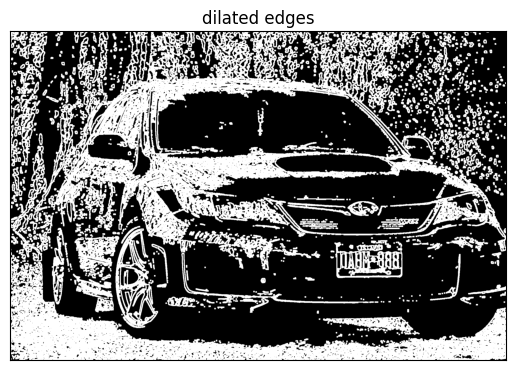

In [23]:
dilationKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilateEdges = cv2.morphologyEx(edgesOnTopHat, cv2.MORPH_DILATE, dilationKernel)

plt.imshow(dilateEdges, cmap='gray')
plt.title('dilated edges'), plt.xticks([]), plt.yticks([])
plt.show()